In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn .metrics import classification_report , accuracy_score , confusion_matrix




In [2]:
card_data = pd.read_csv("creditcard.csv")

In [3]:
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
card_data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
legit = card_data[card_data.Class==0]
fraudulent = card_data[card_data.Class ==1]

In [8]:
print(legit.shape)
print(fraudulent.shape)

(284315, 31)
(492, 31)


In [9]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
card_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


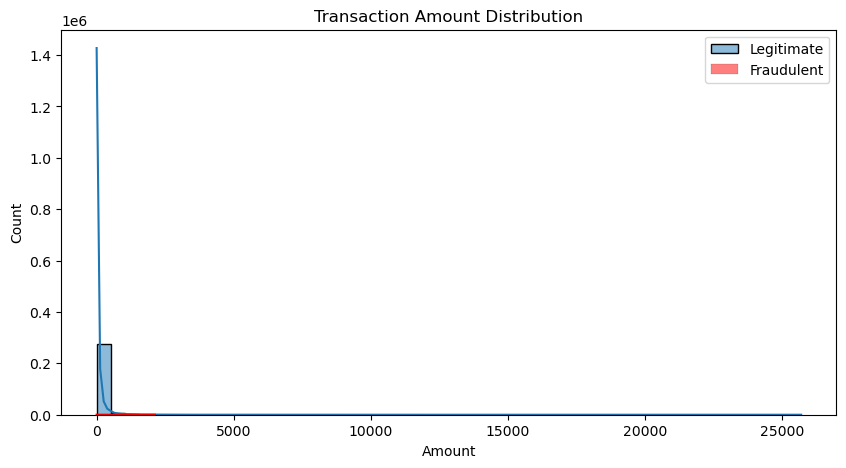

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(legit.Amount, bins=50, kde=True, label='Legitimate')
sns.histplot(fraudulent.Amount, bins=50, kde=True, color='red', label='Fraudulent')
plt.legend()
plt.title('Transaction Amount Distribution')
plt.show()

In [13]:
legit_random_sample = legit.sample(n=492)

In [14]:
joined_dataset = pd.concat([legit_random_sample,fraudulent],axis=0)


In [15]:
joined_dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
245437,152752.0,1.043913,-0.944891,-3.344045,1.115430,0.293003,-1.595641,1.195583,-0.438436,0.275686,...,0.273759,-0.180792,-0.467812,-0.189788,0.127658,-0.593045,-0.069648,0.090301,500.11,0
116643,74372.0,1.177500,0.346828,0.508345,0.764576,-0.413583,-0.899605,0.041749,-0.117895,-0.057756,...,-0.221710,-0.590085,0.221286,0.575322,0.083856,0.090131,-0.003575,0.033374,0.99,0
135225,81156.0,-1.727148,1.126465,1.709943,-1.065297,-1.233085,-0.489570,-0.292988,0.677038,0.626830,...,-0.019266,-0.027588,-0.055576,0.438601,-0.101734,0.789946,-0.540816,-0.213340,21.95,0
75040,55870.0,1.253641,-0.102165,0.328215,-0.331819,-0.353068,-0.282811,-0.254519,-0.018232,0.076274,...,-0.108405,-0.340682,-0.024753,-0.274609,0.195802,0.925289,-0.074453,-0.003000,20.68,0
162682,115291.0,-0.455667,1.008427,-0.221049,-0.749945,1.181699,-0.772090,1.468339,-0.372965,-0.137299,...,0.107053,0.370398,-0.307401,0.693372,0.065641,-0.351916,-0.120885,0.165150,22.49,0


In [16]:
 joined_dataset["Class"].value_counts()


Class
0    492
1    492
Name: count, dtype: int64

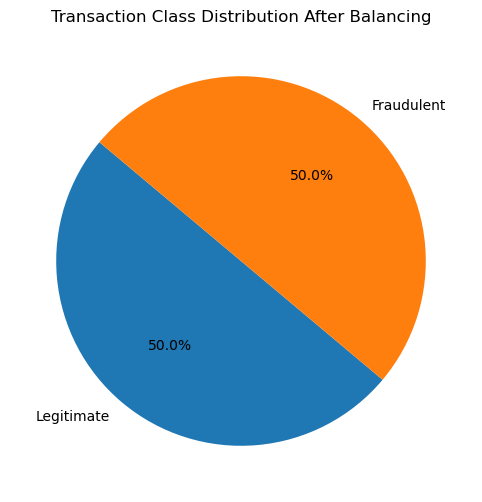

In [17]:
class_counts = joined_dataset["Class"].value_counts()  # Added this line
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=['Legitimate', 'Fraudulent'], autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])
plt.title("Transaction Class Distribution After Balancing")
plt.show()

In [18]:
joined_dataset.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93019.469512,-0.076561,-0.159039,0.128168,-0.074543,0.017114,-0.033386,0.031121,-0.040318,-0.097427,...,-0.014840,-0.002014,0.013084,-0.027116,0.000877,-0.008062,0.007114,-0.019601,0.008423,93.392744
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
m = joined_dataset.drop(columns = "Class",axis =0 )
m

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
245437,152752.0,1.043913,-0.944891,-3.344045,1.115430,0.293003,-1.595641,1.195583,-0.438436,0.275686,...,0.804692,0.273759,-0.180792,-0.467812,-0.189788,0.127658,-0.593045,-0.069648,0.090301,500.11
116643,74372.0,1.177500,0.346828,0.508345,0.764576,-0.413583,-0.899605,0.041749,-0.117895,-0.057756,...,-0.110111,-0.221710,-0.590085,0.221286,0.575322,0.083856,0.090131,-0.003575,0.033374,0.99
135225,81156.0,-1.727148,1.126465,1.709943,-1.065297,-1.233085,-0.489570,-0.292988,0.677038,0.626830,...,-0.180883,-0.019266,-0.027588,-0.055576,0.438601,-0.101734,0.789946,-0.540816,-0.213340,21.95
75040,55870.0,1.253641,-0.102165,0.328215,-0.331819,-0.353068,-0.282811,-0.254519,-0.018232,0.076274,...,0.049808,-0.108405,-0.340682,-0.024753,-0.274609,0.195802,0.925289,-0.074453,-0.003000,20.68
162682,115291.0,-0.455667,1.008427,-0.221049,-0.749945,1.181699,-0.772090,1.468339,-0.372965,-0.137299,...,-0.232135,0.107053,0.370398,-0.307401,0.693372,0.065641,-0.351916,-0.120885,0.165150,22.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [20]:
n = joined_dataset["Class"]
n


245437    0
116643    0
135225    0
75040     0
162682    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [21]:
m_train, m_test , n_train , n_test = train_test_split(m,n,test_size = 0.2,stratify = n,random_state = 2 )

In [22]:
LR = LogisticRegression()
LR.fit(m_train,n_train)

C:\Users\wwwpr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:

m_train_prediction = LR.predict(m_train)
training_accuracy = accuracy_score(m_train_prediction , n_train)

In [24]:
print("accuracy of training data",training_accuracy)

accuracy of training data 0.9504447268106735


In [25]:
cm = confusion_matrix(n_test, m_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'm_test_prediction' is not defined

In [ ]:
m_test_prediction = LR.predict(m_test)

testing_accuracy = accuracy_score(m_test_prediction,n_test)

In [ ]:
print("accuracy of testing data ", testing_accuracy)